# Table of Contents
- Introduction
- Part I - Gathering
- Part II - Assessing
- Part III - 1. Cleaning (tidiness)
- Part III - 2. Cleaning (quality)
- Part IV - Storing, Analyzing, and Visualizing

# Introduction

WeRateDogs™ is a community page on twitter designated to rating dogs on their appearences and stories, and which was formed by the user @dog_rates in 2015. The purpose of this project is getting insightful information about dog ratings from the twitter page WeRateDogs™. 

# Part I
## Gathering

In [1]:
# Import packages
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# Read csv file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Sample view
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1602,685973236358713344,NaN,NaN,2016-01-09 23:55:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lorelei. She's contemplating her exist...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685973236...,11,10,Lorelei,None,None,None,None
1666,682697186228989953,NaN,NaN,2015-12-31 22:57:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NAAAAAAA ZAPENYAAAAA MABADI-CHIBAWAAA 12/10 ht...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682697186...,12,10,None,None,None,None,None
1717,680191257256136705,NaN,NaN,2015-12-25 01:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a sleepy Christmas pupper 11/10 https:/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680191257...,11,10,None,None,None,pupper,None
1685,681654059175129088,NaN,NaN,2015-12-29 01:52:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Toffee. He's a happy pupper. Appears d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681654059...,12,10,Toffee,None,None,pupper,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None


In [4]:
# Read tsv file
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
# Information view
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [6]:
# Open 'tweet-json.txt'file
tweets_data = []
tweet_file = open('tweet-json.txt', 'r')

In [7]:
# Append each tweet into a list
for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [8]:
# Create a dataframe for tweet
tweet_info = pd.DataFrame()

In [9]:
# Add variables to 'tweet ID'
tweet_info['tweet_id'] = list(map(lambda tweet: tweet['id'], tweets_data))

In [10]:
# Add variables to 'retweet count'
tweet_info['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))

In [11]:
# Add variables to 'favorite count'
tweet_info['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

In [12]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


# Part 2
## Assessing

### Dataframe
- 'twitter_archive'
- 'image_predictions'
- 'tweet_info'

#### Twitter Archive

In [13]:
# View sample
twitter_archive.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
987,749036806121881602,NaN,NaN,2016-07-02 00:27:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dietrich. He hops at random. Other dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749036806...,8,10,Dietrich,None,None,None,None
2276,667443425659232256,NaN,NaN,2015-11-19 20:44:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Exotic dog here. Long neck. Weird paws. Obsess...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667443425...,6,10,None,None,None,None,None
314,835172783151792128,NaN,NaN,2017-02-24 17:01:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send in any no...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835172783...,12,10,None,None,None,None,None


In [14]:
# View information
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
# Check rating denominators
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
# Check rating numerators
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [17]:
# View extremely high rating numerators
for comment in twitter_archive[twitter_archive['rating_numerator'] > 25]['text']:
    print(comment)

@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
@markhoppus 182/10
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
This is Atticus. He's quite simply America af. 177

In [18]:
# The number of values in the name column
twitter_archive['name'].value_counts()

None            745
a                55
Charlie          12
Cooper           11
Oliver           11
Lucy             11
Penny            10
Lola             10
Tucker           10
Winston           9
Bo                9
the               8
Sadie             8
Toby              7
Bailey            7
Daisy             7
an                7
Buddy             7
Jack              6
Leo               6
Rusty             6
Bella             6
Oscar             6
Dave              6
Scout             6
Milo              6
Jax               6
Koda              6
Stanley           6
Larry             5
               ... 
Orion             1
Bradlay           1
Monkey            1
Chuck             1
Lenox             1
Jiminus           1
Ralpher           1
Pavlov            1
Barney            1
Al                1
Rose              1
Miley             1
Timber            1
Sage              1
Pip               1
Tyrus             1
Liam              1
Cermet            1
Jockson           1


In [19]:
# The number of values in the source column
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [20]:
# Check duplication
twitter_archive[twitter_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [21]:
# View description
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### Image Predictions

In [22]:
# View information
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
# View sample
image_predictions.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
834,694001791655137281,https://pbs.twimg.com/media/CaGW8JQUMAEVtLl.jpg,1,Pembroke,0.769999,True,Cardigan,0.229228,True,Chihuahua,0.000247,True
252,670717338665226240,https://pbs.twimg.com/media/CU7d2vKUcAAFZyI.jpg,1,Pomeranian,0.368161,True,Pekinese,0.350973,True,golden_retriever,0.114902,True
679,683742671509258241,https://pbs.twimg.com/media/CX0kVRxWYAAWWZi.jpg,1,Pembroke,0.895279,True,Cardigan,0.022385,True,cocker_spaniel,0.017045,True


In [24]:
# Check how many first predictions are dogs
image_predictions['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [25]:
# Check how many second predictions are dogs
image_predictions['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [26]:
# Check how many third predictions are dogs
image_predictions['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [27]:
# Check kinds of dogs which are in the first prediction
image_predictions['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
beagle                        18
Eskimo_dog                    18
Shetland_sheepdog             18
teddy                         18
Maltese_dog                   18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

In [28]:
# Check duplication
image_predictions[image_predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Tweet Information

In [29]:
# View information
tweet_info.sample(3)

,tweet_id,retweet_count,favorite_count
2176,669015743032369152,403,785
554,803692223237865472,8689,0
1184,718540630683709445,1137,2730


In [30]:
# Check duplication
tweet_info[tweet_info.tweet_id.duplicated()]

,tweet_id,retweet_count,favorite_count


In [31]:
# View information
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [32]:
# View 'retweet count'
tweet_info.retweet_count.describe()

count     2354.000000
mean      3164.797366
std       5284.770364
min          0.000000
25%        624.500000
50%       1473.500000
75%       3652.000000
max      79515.000000
Name: retweet_count, dtype: float64

### Find issues to be fixed

#### Tidiness
- These tables are seperated.
- Variables related to dog's stage are spread in different columns.

#### Quality
- Rating denominators are not consistent.
- 'tweet_id' columns should be string types.
- There are missing data in 'expanded_urls'.
- dog's stages should be categorical data.
- There is inconsistency in dog breeds.
- There are missing dog names. (recorded as 'None')
- Several rating numerators are relatively high.
- Many entries are retweets or replies.
- timestamp column should be of datatime type
- There are dog names with 'a', 'an', 'the'

# Part III
## 1. Cleaning (Tidiness)

- These tables are seperated.

#### Join the 3 dataframes in one dataframe

In [33]:
image_predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [34]:
image_predictions['breed_pred'] = [i['p1'] if i['p1_dog'] == True and i['p1_conf'] > 0.2 
                     else i['p2'] if i['p2_dog'] == True and i['p2_conf'] > 0.2 
                     else i['p3'] if i['p3_dog'] == True and i['p3_conf'] > 0.2 
                     else np.nan for index, i in image_predictions.iterrows()]

In [35]:
image_predictions.breed_pred.value_counts()

golden_retriever                  152
Labrador_retriever                 99
Pembroke                           90
Chihuahua                          79
pug                                56
Samoyed                            44
chow                               41
toy_poodle                         39
Pomeranian                         37
malamute                           30
cocker_spaniel                     28
French_bulldog                     27
Chesapeake_Bay_retriever           22
miniature_pinscher                 20
German_shepherd                    20
Siberian_husky                     19
Staffordshire_bullterrier          19
Cardigan                           18
beagle                             17
Rottweiler                         17
Shetland_sheepdog                  16
Maltese_dog                        16
Lakeland_terrier                   16
Eskimo_dog                         16
kuvasz                             16
Shih-Tzu                           15
basset      

In [36]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [37]:
t1 = twitter_archive[['tweet_id', 'in_reply_to_status_id', 'retweeted_status_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']]

In [38]:
t2 = image_predictions[['tweet_id', 'breed_pred']]

In [39]:
total = pd.merge(t1, t2, on=['tweet_id'], how='left')

In [40]:
total

,tweet_id,in_reply_to_status_id,retweeted_status_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,breed_pred
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,Chihuahua
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,Chihuahua
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,basset
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,Chesapeake_Bay_retriever
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,Appenzeller
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,Pomeranian
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,Irish_terrier
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,Pembroke


In [41]:
tweet_info['tweet_id'] = tweet_info['tweet_id'].astype('int64')

In [42]:
total = pd.merge(total, tweet_info, on=['tweet_id'], how= 'left')

In [43]:
total['tweet_id'] = total['tweet_id'].astype('object')

In [44]:
total

,tweet_id,in_reply_to_status_id,retweeted_status_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,breed_pred,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,Chihuahua,6514.0,33819.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,Chihuahua,4328.0,25461.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NaN,8964.0,42908.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,basset,9774.0,41048.0
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,Chesapeake_Bay_retriever,3261.0,20562.0
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,Appenzeller,2158.0,12041.0
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,Pomeranian,16716.0,56848.0
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,Irish_terrier,4429.0,28226.0
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,Pembroke,7711.0,32467.0


- Variables related to dog's stage are spreaded in different columns.

#### Create a categorical colum to combine dog's stages 

In [45]:
total['stage'] = ['doggo' if 'doggo' in i
                 else 'pupper' if 'pupper' in i
                 else 'floofer' if 'floofer' in i
                 else 'floof' if 'floof' in i
                 else 'puppo' if 'puppo' in i
                 else np.nan for i in total['text'].str.lower()]

In [46]:
total['stage'] = total['stage'].astype('category')

In [47]:
total.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [48]:
total['stage'].dtype

CategoricalDtype(categories=['doggo', 'floof', 'floofer', 'pupper', 'puppo'], ordered=False)

In [49]:
total.head(3)

,tweet_id,in_reply_to_status_id,retweeted_status_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,breed_pred,retweet_count,favorite_count,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853.0,39467.0,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,Chihuahua,6514.0,33819.0,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,Chihuahua,4328.0,25461.0,NaN


## 2. Cleaning (Quality)

- There are missing dog names.(recorded as 'None')

In [50]:
total['name'] = total['name'].replace('None', np.nan)

In [51]:
# test
assert sum(total['name'] == 'None') == 0

- There are inconsistency in dog breeds.

In [52]:
total['breed_pred'] = total['breed_pred'].astype('str')

In [53]:
total['breed_pred'] = total['breed_pred'].str.lower().str.replace('_', ' ').str.replace('-', ' ')

In [54]:
total['breed_pred'] = total['breed_pred'].replace('nan', np.nan)

In [55]:
# test
total['breed_pred'].value_counts()

golden retriever                  152
labrador retriever                 99
pembroke                           90
chihuahua                          79
pug                                56
samoyed                            44
chow                               41
toy poodle                         39
pomeranian                         37
malamute                           30
cocker spaniel                     28
french bulldog                     27
chesapeake bay retriever           22
german shepherd                    20
miniature pinscher                 20
siberian husky                     19
staffordshire bullterrier          19
cardigan                           18
rottweiler                         17
beagle                             17
maltese dog                        16
eskimo dog                         16
shetland sheepdog                  16
kuvasz                             16
lakeland terrier                   16
shih tzu                           15
basset      

- There are missing data in 'expanded_urls'.

In [56]:
total['expanded_urls'] = [str('https://twitter.com/dog_rates/status/' + str(id)) 
                              for id, url in zip(total['tweet_id'], total['expanded_urls'])]

In [57]:
# test
assert total['expanded_urls'].isnull().any() == False

- Many entries are retweets or replies.

In [58]:
total = total.drop(total[(total['in_reply_to_status_id'].isnull() == False) | (total['retweeted_status_id'].isnull() == False)].index)

In [59]:
total = total.drop(['in_reply_to_status_id', 'retweeted_status_id'], axis=1)

In [60]:
# test
total.shape

(2097, 11)

- Rating denominators are not consistent.
- Several rating numerators are relatively high.

In [61]:
total['rating_num'] = [int(round(num/(denom/10)))  if denom != 10 and num/denom <= 2 
                           else num for num, denom in zip(total['rating_numerator'], total['rating_denominator'])]

In [62]:
total['rating_denom'] = [10 if denom != 10 and num/denom <= 2
                             else denom for num, denom in zip(total['rating_numerator'], total['rating_denominator'])]


In [63]:
total = total.drop(['rating_numerator', 'rating_denominator'], axis=1)

In [64]:
# test denominators
total['rating_denom'].unique()

array([10,  7])

In [65]:
# test numerators
total['rating_num'].unique()

array([  13,   12,   14,    5,   11,    6,   10,    0,   24,   75,   27,
          3,    7,    8,    9,    4, 1776,    2,   26,    1,  420])

In [66]:
# drop the rows which contiain too high ratings
total = total.drop(total[((total['rating_denom'] != 10) | (total['rating_num'] > 20))].index)

In [67]:
# test
total['rating_denom'].unique(), total['rating_num'].unique()

(array([10]),
 array([13, 12, 14,  5, 11,  6, 10,  0,  3,  7,  8,  9,  4,  2,  1]))

- There are dog names with 'a', 'an', 'the'

In [68]:
total['name'] = total['name'].replace(['a', 'an', 'the'], np.nan)

In [69]:
# test
assert sum(total['name'] == 'a') + sum(total['name'] == 'an') + sum(total['name'] == 'a') == 0

- timestamp column should be of datatime type

In [70]:
total['timestamp'] = pd.to_datetime(total['timestamp'], format='%Y-%m-%d %H:%M:%S')

In [71]:
# test
total.sample(10)

,tweet_id,timestamp,text,expanded_urls,name,breed_pred,retweet_count,favorite_count,stage,rating_num,rating_denom
493,813202720496779264,2016-12-26 02:00:11,Here's a doggo who has concluded that Christma...,https://twitter.com/dog_rates/status/813202720...,NaN,cocker spaniel,2090.0,10192.0,doggo,11,10
722,783085703974514689,2016-10-03 23:25:55,This is Earl. He can't catch. Did his best tho...,https://twitter.com/dog_rates/status/783085703...,Earl,chesapeake bay retriever,2565.0,9112.0,NaN,11,10
1331,705591895322394625,2016-03-04 03:13:11,"""Ma'am, for the last time, I'm not authorized ...",https://twitter.com/dog_rates/status/705591895...,NaN,basenji,1308.0,3475.0,NaN,11,10
871,761599872357261312,2016-08-05 16:28:54,"This is Sephie. According to this picture, she...",https://twitter.com/dog_rates/status/761599872...,Sephie,gordon setter,1336.0,4578.0,NaN,11,10
348,831670449226514432,2017-02-15 01:04:21,This is Daisy. She has a heart on her butt. 13...,https://twitter.com/dog_rates/status/831670449...,Daisy,pembroke,2059.0,11469.0,NaN,13,10
1792,677334615166730240,2015-12-17 03:48:51,This dog gave up mid jump. 9/10 https://t.co/K...,https://twitter.com/dog_rates/status/677334615...,NaN,lakeland terrier,328.0,1477.0,NaN,9,10
752,778990705243029504,2016-09-22 16:13:51,This is Jay. He's really h*ckin happy about th...,https://twitter.com/dog_rates/status/778990705...,Jay,cocker spaniel,8437.0,22342.0,NaN,11,10
1656,683357973142474752,2016-01-02 18:43:31,"""Have a seat, son. There are some things we ne...",https://twitter.com/dog_rates/status/683357973...,NaN,pembroke,1059.0,3238.0,NaN,10,10
119,869772420881756160,2017-05-31 04:27:59,"This is Dewey (pronounced ""covfefe""). He's hav...",https://twitter.com/dog_rates/status/869772420...,Dewey,pembroke,10663.0,43710.0,NaN,13,10
280,839549326359670784,2017-03-08 18:52:12,Meet Winston. He knows he's a little too big f...,https://twitter.com/dog_rates/status/839549326...,Winston,NaN,8805.0,29957.0,NaN,12,10


In [72]:
# save 'total' dataframe to a csv file
total.to_csv('twitter_archive_master.csv', index=False)

# Part IV
## Storing, Analyzing, and Visualizing

In [73]:
# Import matplotlib, seaborn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.25)
% matplotlib inline

In [74]:
# Import csv file
df = pd.read_csv('twitter_archive_master.csv')

In [75]:
# View shape of df
df.shape

(2091, 11)

In [76]:
# The top 10 represented dog breeds
df['breed_pred'].value_counts()[:10]

golden retriever      137
labrador retriever     93
pembroke               88
chihuahua              74
pug                    53
samoyed                40
chow                   39
toy poodle             37
pomeranian             36
malamute               29
Name: breed_pred, dtype: int64

In [77]:
# The top 10 represented dog names
df['name'].value_counts()[:10]

Lucy       11
Charlie    11
Oliver     10
Cooper     10
Penny       9
Tucker      9
Sadie       8
Winston     8
Lola        8
Toby        7
Name: name, dtype: int64

In [78]:
# Information about dogs' ratings
df['rating_num'].describe()

count    2091.000000
mean       10.598278
std         2.161710
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_num, dtype: float64

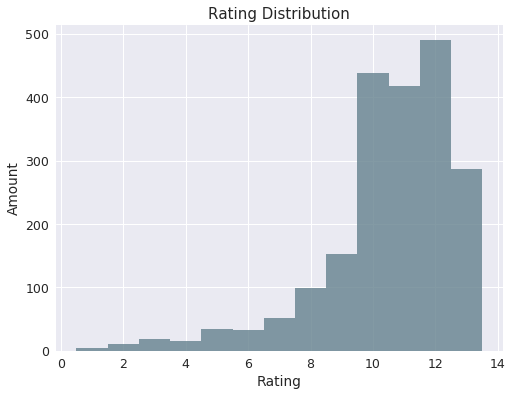

In [79]:
# Information of ratings on a histogram
plt.figure(figsize=[8,6])
plt.hist(df['rating_num'], bins=np.arange(0.5, 14.5, 1), alpha=0.8, color='#64818e')
plt.xlabel('Rating')
plt.ylabel('Amount')
plt.title('Rating Distribution');

In [80]:
# Information about favorite counts
df['favorite_count'].describe()

count      2091.000000
mean       8983.248207
std       12213.156088
min          81.000000
25%        2045.500000
50%        4188.000000
75%       11434.000000
max      132810.000000
Name: favorite_count, dtype: float64

In [81]:
# Information about retweet counts
df['retweet_count'].describe()

count     2091.000000
mean      2841.095170
std       4714.588405
min         16.000000
25%        643.500000
50%       1403.000000
75%       3285.000000
max      79515.000000
Name: retweet_count, dtype: float64

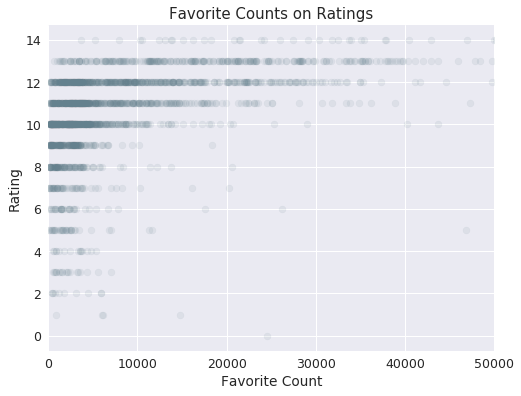

In [82]:
# Favorite couts over time
plt.figure(figsize=[8,6])
plt.scatter(x=df['favorite_count'], y=df['rating_num'], alpha=0.1, color='#64818e')
plt.xlim(0, 50000)
plt.xlabel('Favorite Count')
plt.ylabel('Rating')
plt.title('Favorite Counts on Ratings');

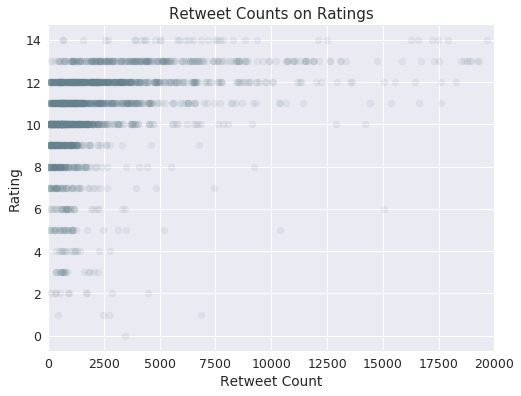

In [83]:
# Retweet counts over time
plt.figure(figsize=[8,6])
plt.scatter(x=df['retweet_count'], y=df['rating_num'], alpha=0.1, color='#64818e')
plt.xlim(0, 20000)
plt.xlabel('Retweet Count')
plt.ylabel('Rating')
plt.title('Retweet Counts on Ratings');

In [84]:
# Groups the dataset by dog stages
stage_groups_fav = df.groupby('stage')['favorite_count'].mean()

# Sorts the stage groups by descending order
stage_groups_fav = stage_groups_fav.sort_values(ascending=False)
stage_groups_fav

stage
puppo      21977.785714
doggo      17080.164835
floofer    11064.444444
floof       8068.888889
pupper      7114.540984
Name: favorite_count, dtype: float64

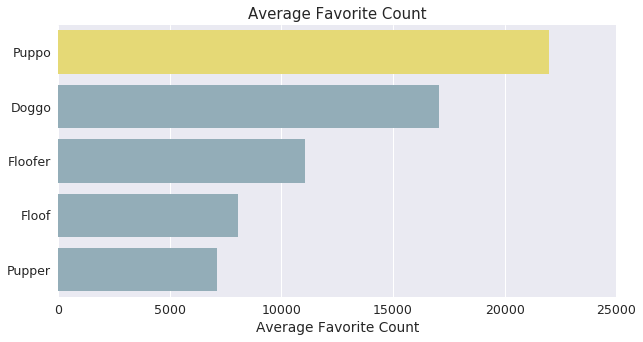

In [85]:
# Average favorite counts on bar chart
x_axis = list(stage_groups_fav)
y_axis = [i.title() for i in stage_groups_fav.index]

plt.figure(figsize=[10,5])
plt.xlim(0,25000)
plt.xlabel('Average Favorite Count')
plt.title('Average Favorite Count')
colors = ['#8dafbe' if (x < max(x_axis)) else '#f8e863' for x in x_axis]
ax = sns.barplot(x=x_axis, y=y_axis, label=y_axis, color="a", palette=colors)
plt.show();